In [1]:
import numpy as np
import sympy as sp
from astropy.table import QTable
import matplotlib.pyplot as plt
import astropy.units as u

In [16]:
o_lamb = 0.7
o_m = 0.3

In [3]:
dict = {
    # Redshift:
    'z': np.array([.01, .1, .5, 1.0, 1.5, 2.0, 3.0, 4.0, 10.0, 100.0]), 

    # Age of Universe at Redshift Z
    't_z': np.array([13.3, 12.2, 8.4, 5.7, 4.2, 3.2, 2.1, 1.5, 0.5, .02]),

    # Lookback Times
    't_L': np.array([.1, 1.3, 5.0, 7.7, 9.3, 10.2, 11.4, 11.9, 13.0, 13.4]), 
    
    # Angular Diameter Distance
    'd_angular' : np.array([42.3, 380.4, 1259.0, 1651.8, 1745.3, 1726.3, 1588.6, 1433.7, 857.8, 124.6]),

    # Luminosity Distance
    'd_lume' : np.array([43.2, 460.3, 2832.8, 6607.1, 10908.2, 15537.0, 25417.2, 35842.4, 103795.9, 1270535.7])
    
}

table = QTable(dict)
table

<QTable length=10>
   z      t_z     t_L   d_angular   d_lume 
float64 float64 float64  float64   float64 
------- ------- ------- --------- ---------
   0.01    13.3     0.1      42.3      43.2
    0.1    12.2     1.3     380.4     460.3
    0.5     8.4     5.0    1259.0    2832.8
    1.0     5.7     7.7    1651.8    6607.1
    1.5     4.2     9.3    1745.3   10908.2
    2.0     3.2    10.2    1726.3   15537.0
    3.0     2.1    11.4    1588.6   25417.2
    4.0     1.5    11.9    1433.7   35842.4
   10.0     0.5    13.0     857.8  103795.9
  100.0    0.02    13.4     124.6 1270535.7

## Question 5 
Plot z on the x-axis, $t_{L}$ on the y-axis. Describe what happens around a 
redshift of z ~ 1.0 to the lookback time. Why does this happen?

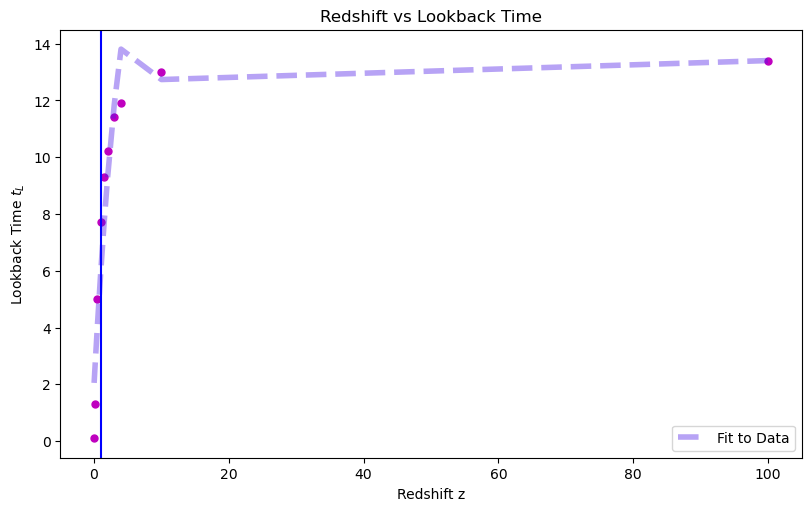

In [4]:
x5 = table['z']
y5 = table['t_L']

fit5 = np.polyfit(x5.value, y5.value, 3)
polyfit5 = np.poly1d(fit5)

fig5, ax5 = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax5.set_xlabel("Redshift z")
ax5.set_ylabel(r"Lookback Time $t_{L}$")
ax5.set_title("Redshift vs Lookback Time")

# ax.set_xlim([3.6, 4.6])
# ax.set_ylim([14, 20])

ax5.plot(x5, y5,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 5);

ax5.plot(x5, polyfit5(x5.value),
        marker = "None",
        linewidth = 4,
        color = (0.3, 0.1, 0.9, 0.4),
        linestyle = '--',
        label = "Fit to Data")

plt.axvline(x = 1, color = 'b')

ax5.legend(loc=0);

At around z = 1 (shown by blue line), the graph suddenly bends into a plateau. The lookback times begin to steady to a constant as redshift becomes large because it cannot surpass the age of the Universe, which is about a little under 14 byrs. At an infinite redshift, the lookback time becomes exactly the age of the Universe.

## Question 6 
Plot R (aka the scale factor) on the y-axis and $t_{z}$ on the x-axis. Then, plot the function $\left( \frac{t_{z}}{16.1}\right)^\left(\frac{2}{3}\right)$ in a  different color atop this plot. Do they follow each other? When (in $t_{z}$), do these two forms diverge from each other, and at what z? Why?

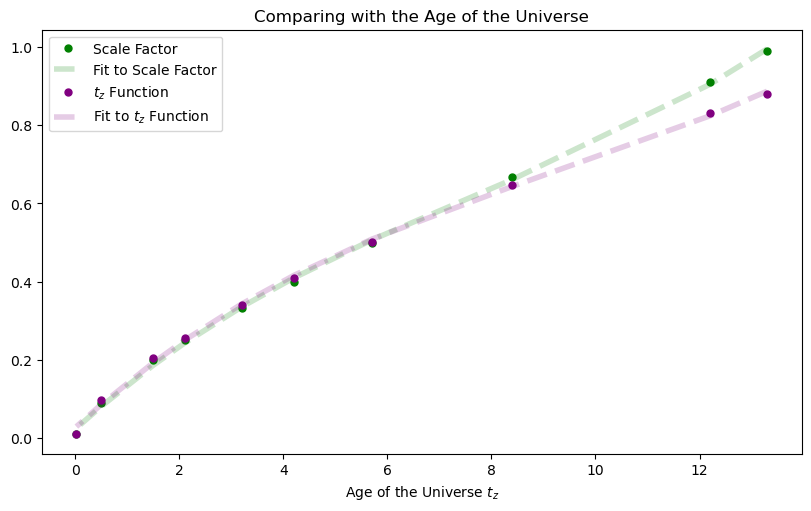

In [5]:
x6 = table['t_z']
y6a = 1 / (1 + table['z'])
y6b = (table['t_z'] / 16.1)**(2/3)

fig6, ax6 = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax6.set_xlabel(r"Age of the Universe $t_{z}$")
ax6.set_title("Comparing with the Age of the Universe")

## Scale Factor

ax6.plot(x6, y6a,
        color = "green",
        marker = "o",
        linestyle = "None",
        label = "Scale Factor",
        markersize = 5);

fit6a = np.polyfit(x6.value, y6a.value, 3)
polyfit6a = np.poly1d(fit6a)

ax6.plot(x6, polyfit6a(x6.value),
        marker = "None",
        linewidth = 4,
        color = ("green", 0.2),
        linestyle = '--',
        label = "Fit to Scale Factor")


## t_z function

ax6.plot(x6, y6b,
        color = "purple",
        marker = "o",
        linestyle = "None",
        label = r"$t_{z}$ Function",
        markersize = 5);

fit6b = np.polyfit(x6.value, y6b.value, 3)
polyfit6b = np.poly1d(fit6b)

ax6.plot(x6, polyfit6b(x6.value),
        marker = "None",
        linewidth = 4,
        color = ("purple", 0.2),
        linestyle = '--',
        label = r"Fit to $t_{z}$ Function")


##---------------------
# ax6.set_ylim([0, 1.5])
# ax6.plot(x6, table['z'],
#         linewidth = 2,
#         color = ("blue", 0.2),
#         label = "Redshift vs Age")


ax6.legend(loc=2);

For the most part, the scale factor and the function follow each other, until the age of the universe surpasses 6 byrs and redshift 0.5. After this point, the scale factor experiences a steeper incline than the function, and the data points begin to diverge as time increases. This is because we transition from a matter-dominated to a dark matter-dominated universe which changes the main omega term in the scale factor.

## Question 7
With log10 (z) on x-axis, put log10 of DL on the yaxis, and also log10 of DA on the y-axis. At
approximately what redshift does the angular diameter distance turn over? Verify that
D L = D A (1 + z) 2 by plotting that as a different color line atop the plot.

In [6]:
table

<QTable length=10>
   z      t_z     t_L   d_angular   d_lume 
float64 float64 float64  float64   float64 
------- ------- ------- --------- ---------
   0.01    13.3     0.1      42.3      43.2
    0.1    12.2     1.3     380.4     460.3
    0.5     8.4     5.0    1259.0    2832.8
    1.0     5.7     7.7    1651.8    6607.1
    1.5     4.2     9.3    1745.3   10908.2
    2.0     3.2    10.2    1726.3   15537.0
    3.0     2.1    11.4    1588.6   25417.2
    4.0     1.5    11.9    1433.7   35842.4
   10.0     0.5    13.0     857.8  103795.9
  100.0    0.02    13.4     124.6 1270535.7

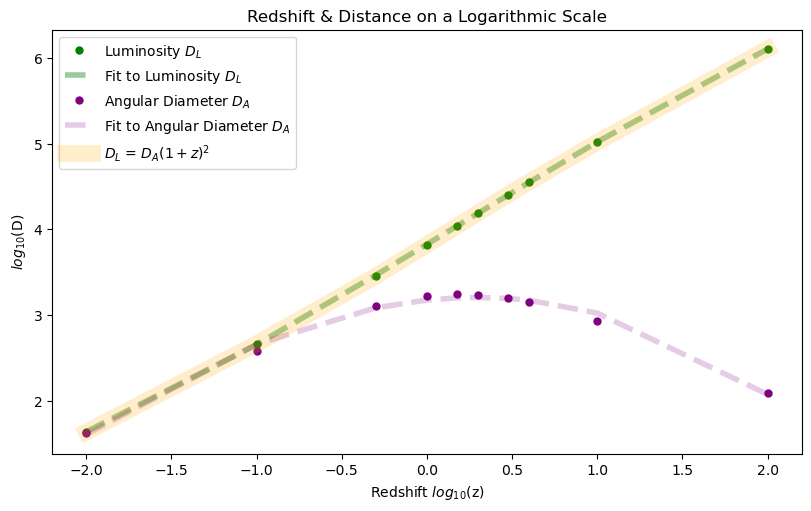

In [7]:
x7 = np.log10(table['z'])
y7a = np.log10(table['d_lume'])
y7b = np.log10(table['d_angular'])

fig7, ax7 = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax7.set_xlabel(r"Redshift $log_{10}$(z)")
ax7.set_title("Redshift & Distance on a Logarithmic Scale")
ax7.set_ylabel(r"$log_{10}$(D)")

## Luminosity Distance

ax7.plot(x7, y7a,
        color = "green",
        marker = "o",
        linestyle = "None",
        label = r"Luminosity $D_{L}$",
        markersize = 5);

fit7a = np.polyfit(x7.value, y7a.value, 3)
polyfit7a = np.poly1d(fit7a)

ax7.plot(x7, polyfit7a(x7.value),
        marker = "None",
        linewidth = 4,
        color = ("green", 0.4),
        linestyle = '--',
        label = r"Fit to Luminosity $D_{L}$")


## Angular Diameter Distance

ax7.plot(x7, y7b,
        color = "purple",
        marker = "o",
        linestyle = "None",
        label = r"Angular Diameter $D_{A}$",
        markersize = 5);

fit7b = np.polyfit(x7.value, y7b.value, 3)
polyfit7b = np.poly1d(fit7b)

ax7.plot(x7, polyfit7b(x7.value),
        marker = "None",
        linewidth = 4,
        color = ("purple", 0.2),
        linestyle = '--',
        label = r"Fit to Angular Diameter $D_{A}$")


## Verifying with Function
y7c = np.log10( table['d_angular'] * (1+table['z'])**2 )

ax7.plot(x7, y7c,
        marker = "None",
        linewidth = 12,
        color = ("orange", 0.2),
        label = r"$D_{L}$ = $D_{A}(1 + z)^{2}$")

ax7.legend(loc=2);

Looking at the graph, we can verify that $D_{L} = D_{A}\left(1 + z\right)^{2}$ follows the luminosity distance $D_{L}$.

The angular diameter distance turns over at approximately a $log_{10}$ redshift of 0.4 (or z = 2.512).

## Question 8
Write a few sentences about the implications of and reason for this turnover in angular
diameter distance (it can seem paradoxical, but it makes sense if you think about it!!)


At a redshift of 2.5, the distance to an object begins to turn over and appear closer. As redshift increases, we know that means the distance is also increasing. However, after a particular redshift, objects begin to appear larger in the sky despite being further away. Delving into a little relativity, this is caused by the expansion of the universe. When an observer is further from an object, it takes more time for the light from that object to reach their eyes. But, the universe never stops expanding -  so as an observer "waits" for the lightwaves to hit their eyes, the object continues to travel further away. By the time those lightwaves from that particular instance hits the observer's eyes, the object is already much further, which creates this illusion that it got bigger in size. 

It's sorta similar to how one might interpret that the volume of music is getting louder if a person is walking away a the speaker and the listener continues to hear a constant volume. 

## Question 9
You measure a redshift for a galaxy at z = 10.0! Wow, that’s really high! You take an
incredible, high-resolution image of this galaxy that allows you to measure an angular
size of 2” for the galaxy (it’s full diameter). What is the size of this high-z galaxy in kpc?

Some equations:

$$\begin{aligned} 
&s = ad \\ 
&v = cz \\
&v = H_{0}d
\end{aligned}$$

$$s = 2dtan\left( \frac{a}{2}\right) \longrightarrow s = 2\left( \frac{cz}{H_{0}}\right)tan\left( \frac{a}{2}\right) $$
Where s = actual size, a = angular size, and d = distance.

In [42]:
hubble = 70 * (u.km/u.s)*(1e6 * u.pc)*(1e6*u.pc) # <--- squared b/c it was given in mpc and second is converting it to pc

hubble, (1/7)*3e5, 70*1e6

(<Quantity 7.e+13 pc2 km / s>, 42857.142857142855, 70000000.0)

In [28]:
c = 3e5
z9 = 10.0
dangular9 = 2 * u.arcsec
display(f"{dangular9} = {dangular9.to(u.degree)} = {dangular9.to(u.radian)}")

'2.0 arcsec = 0.0005555555555555556 deg = 9.69627362219072e-06 rad'

In [43]:
z, H, light = sp.symbols('z, H_0, c')
d = (light*z) / H

with sp.evaluate(False):
    display(d, d.subs({
    light: c,
    z: z9,
    H: hubble.value
}))

dsolve = d.subs({
    light: c,
    z: z9,
    H: hubble.value
})
display(dsolve)

c*z/H_0

300000.0*10.0/70000000000000.0**1

4.28571428571429e-8

In [44]:
dist, a = sp.symbols('d, a')
eq9a = (2 * dist) * sp.tan(a/2)
display(eq9a, f"Hubble constant: {hubble}")

2*d*tan(a/2)

'Hubble constant: 70000000000000.0 pc2 km / s'

In [47]:
# First way of solving via trigonometry

with sp.evaluate(False):
    display(eq9a, eq9a.subs({
        dist: dsolve, 
        a: dangular9.to(u.radian).value
    }))

"{:e}".format(eq9a.subs({
        dist: dsolve, 
        a: dangular9.to(u.radian).value
    })*1000) # <--- dividing by 0.001 to convert pc to kpc

2*d*tan(a/2)

2*4.28571428571429e-8*tan((1/2)*9.69627362219072e-6)

'4.15554583811429e-10'

In [15]:
# Second way of solving via small angle approximation
eq9b = a * ((light*z)/H)

with sp.evaluate(False):
    display(eq9b, eq9b.subs({
        z: 10,
        a: dangular9.to(u.radian).value,
        light: c,
        H: hubble.value
    }))

"{:e}".format(eq9b.subs({
        z: 10,
        a: dangular9.to(u.radian).value,
        light: c,
        H: hubble.value
    })/0.001) # <--- dividing by 0.001 to convert pc to kpc

a*c*z/H_0

9.69627362219072e-6*300000.0*10/70000000.0**1

'4.15554583808174e-4'

*ignore, something wrong with conversions. ended up doing by hand, the correct answer is supposed to be 416 kpc.

## Question 10
The compact cores of quasars are “standard rulers” – that is, they all have the same
physical size. Discuss (and a write a few sentences) about what observations and
measurements you would make using these compact quasar cores as a cosmological
test. What parameter do you think this cosmological test is most sensitive to?

Cosmological tests are ways to determine the expansion of the universe so we can understand more about the universe's characteristics. Essentially, it's taking information from the past to look for patterns that could help predict the future. Standard rulers are reliable because they have a fixed size, but more importantly, are objects of the same type. Just as standard candles are used for luminosity distance, standard rulers use their angular size (a) to help determine the true distance (d) and redshift (z). Through Hubble's Law, we can characterize the distance and expansion rate $H_{0}$...

$$ v = H_{0}d \longrightarrow d = \left( \frac{cz}{H_{0}}\right) $$

...and with the help of some formulas, it can be used to calculate the geometry and true size (s) of a standard ruler (where a is in radians):

Trigonometry: $ s = 2\left( \frac{cz}{H_{0}}\right)tan\left( \frac{a}{2}\right) $ \
Small Angle Formula: $ s = da $ 


Together, these pieces of information help form the cosmic distance ladder. 

The compact cores of quasars all have the same physical size, so they're considered "standard rulers". Considering these formulas, their angular size is a huge helper in providing important information like expansion rate! However, a precise measurement in angular size is required to get an accurate interpretation of other parameters. The level of uncertainty is determined by how a measurement is taken, whether that's through an estimation or special precise tools. With spectroscopy, the determined redshift can be used along with the angular size to determine other parameters. However, redshifts have a limitation because they are proportional to distance. The further away an object is, the dimmer it is and the more undetectable its redshift becomes. At longer distances, higher redshifts are also at risk of data contamination. Spectroscopies themselves, although generally a great tool, also have some challenges too. It can be difficult to interpret the redshift through complicated spectra, which can add to the uncertainty from sensitivity to the measurement conditions and preparation. These uncertainties can make redshift the most sensitive parameter of a cosmological test. 